In [2]:
import sys
sys.path.append('../')
import os
print(os.getcwd())
from End2End_ML.src import create_dataset,create_feat_dataset
from End2End_ML import config
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

config

c:\Users\Teja\Documents\_INFOTECH\jobs\stepstone_demo\End2End_ML


{'raw_data_path': ['assets', 'raw_data', 'car_data.csv'],
 'clean_data_path': ['assets', 'raw_data', 'clean_car_data.csv'],
 'model_path': ['assets', 'models'],
 'current_year': 2021,
 'feat_data_set_stats': ['assets', 'feat_data', 'feat_stats.csv'],
 'feat_importances': ['assets', 'feat_data', 'feat_imp.csv'],
 'feat_importance_plot': ['assets', 'feat_data', 'feat_imp.jpg'],
 'ds_features': ['assets', 'feat_data', 'features.csv'],
 'ds_target': ['assets', 'feat_data', 'targets.csv'],
 'random_seed': 2020,
 'n_estimators': 2400,
 'max_features': 'auto',
 'max_depth': 29,
 'min_samples_split': 15,
 'min_samples_leaf': 6,
 'warm_start': False,
 'learning_rate': 0.1,
 'n_neighbors': 5,
 'model_name': 'GradientBoostingRegressor'}

In [3]:
raw_data = create_dataset.load_raw_data()

create_dataset.clean_Data(raw_data)

clean_df = create_dataset.load_clean_data()
#create_dataset.clean_Data(create_dataset.load_raw_data())
clean_df.head(2)

c:\Users\Teja\Documents\_INFOTECH\jobs\stepstone_demo\End2End_ML


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8


,Year,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,7,0,1,0,1
1,2013,9.54,43000,0,8,1,0,0,1


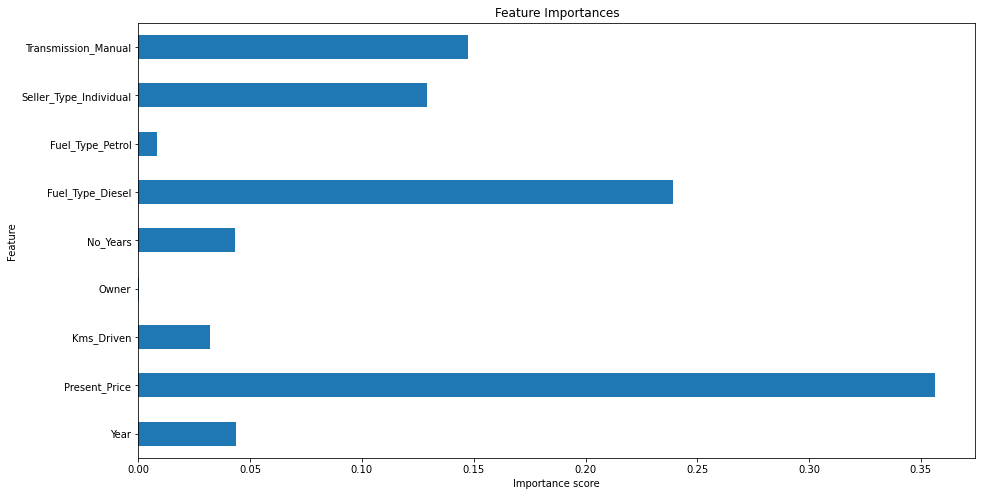

In [4]:
#%matplotlib-agg
X,Y = create_feat_dataset.create_feat_dataset(clean_df)
X.head(2)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=config['random_seed'])
X_train.shape

(240, 9)

In [12]:
regressor=RandomForestRegressor(n_estimators=2400, max_depth=40)

In [13]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(max_depth=40, n_estimators=2400)

In [14]:
preds=regressor.predict(X_test)
rmse = mean_squared_error(Y_test,preds)**0.5
rmse
r2 = r2_score(Y_test,preds)
r2

0.7918927476671713

c:\Users\Teja\Documents\_INFOTECH\jobs\stepstone_demo\env_end2endml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

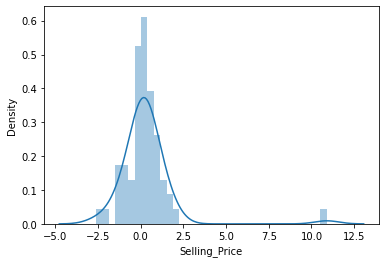

In [15]:
import seaborn as sns
sns.distplot(preds-Y_test)

In [16]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
cross_val_score(RandomForestRegressor(),X,Y,cv=cv)

array([0.96396616, 0.91316332, 0.96964577, 0.86346754, 0.95933804])

In [17]:
 #Randomized Search CV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

rf=RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train,Y_train)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [26]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [27]:
best_rf=RandomForestRegressor(**rf_random.best_params_)
best_rf.fit(X_train,Y_train)
preds=best_rf.predict(X_test)
rmse = mean_squared_error(Y_test,preds)**0.5
rmse
r2 = r2_score(Y_test,preds)
r2,rmse

(0.597209759457637, 2.2891273533867147)

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from End2End_ML import config
regressor = GradientBoostingRegressor(n_estimators=config['n_estimators'],
                                  max_features=config['max_features'],
                                  max_depth=config['max_depth'],
                                  min_samples_split=config['min_samples_split'],
                                  min_samples_leaf=config['min_samples_leaf'])
regressor.fit(X_train,Y_train)



GradientBoostingRegressor(max_depth=29, max_features='auto', min_samples_leaf=6,
                          min_samples_split=15, n_estimators=2400)

In [21]:
preds=regressor.predict(X_test)
rmse = mean_squared_error(Y_test,preds)**0.5
rmse
r2 = r2_score(Y_test,preds)
r2,rmse

(0.6952252820395144, 1.9912232488870742)

In [30]:
#load model and predict on new data
import pickle
model_path = r'C:\Users\Teja\Documents\_INFOTECH\jobs\stepstone_demo\End2End_ML\assets\models\GradientBoostingRegressor_rmse_1.33_r2_0.86.pkl'
with open(model_path, 'rb') as f:
    regressor = pickle.load(f)

regressor.predict(X_test)

preds=regressor.predict(X_test)
rmse = mean_squared_error(Y_test,preds)**0.5
r2 = r2_score(Y_test,preds)
r2,rmse

(0.8644475293848799, 1.327957585591299)

In [28]:
X_test.head()


,Year,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
248,2013,4.60,30000,0,8,0,1,0,1
192,2007,0.75,49000,1,14,0,1,1,1
185,2008,0.58,1900,0,13,0,1,1,0
204,2015,4.43,28282,0,6,0,1,0,1
75,2015,6.80,36000,0,6,0,1,0,1


In [37]:
Year = 2015
current_Year = 2021
Present_Price = 7.56	
Kms_Driven	=    15000
Owner	= 2
No_Years	= current_Year - Year
Fuel_Type_Diesel = 1	
Fuel_Type_Petrol = 0	
Seller_Type_Individual = 1	
Transmission_Manual = 0

new_data = np.asarray([Year,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual])
new_data = new_data.reshape(1,-1)
regressor.predict(new_data)

array([4.86100238])

In [ ]:

    ip_Year = st.sidebar.date_input(label='Year of purchase',on_change=None).year
    ip_Present_Price = st.sidebar.slider(label='Present Price (in Hundred thousands INR)', min_value=1.0, max_value=35.0, value=7.0, key=None, 
            help='Enter current price of the Car', on_change=None, args=None, kwargs=None)
    ip_Kms_Driven = st.sidebar.slider(label='Odo meter reading (in Km)',min_value=100,max_value=200000,help='Number of kilometres driven',on_change=None,value=15000)
    Owner = st.sidebar.number_input(label="Number of previous owners", min_value=0,max_value=5,on_change=None)
    No_Years = datetime.datetime.now().year - ip_Year
    ip_Fuel_type = st.sidebar.selectbox(label='Fuel Type', options=['Petrol', 'Diesel', 'CNG'],on_change=None)

    if ip_Fuel_type == 'Petrol':
        Fuel_Type_Diesel = 0
        Fuel_Type_Petrol = 1
    elif ip_Fuel_type == 'Diesel':
        Fuel_Type_Diesel = 1
        Fuel_Type_Petrol = 0
    elif ip_Fuel_type == 'CNG':
        Fuel_Type_Diesel = 0
        Fuel_Type_Petrol = 0

    ip_Seller_Type_Individual = st.sidebar.radio(label='Seller Type', options=['Individual', 'Dealer','Organization'],on_change=None) 
    if ip_Seller_Type_Individual == 'Individual':
        Seller_Type_Individual = 1
    else:
        Seller_Type_Individual = 0  

    ip_Transmission = st.sidebar.selectbox(label='Transmission Type', options=['Manual', 'Automatic'],on_change=None)
    if ip_Transmission == 'Manual':
        Transmission = 1
    else:
        Transmission = 0

    input_data = {
        'Year':ip_Year,
        'Present_Price':ip_Present_Price,
        'Kms_Driven':ip_Kms_Driven,
        'Owner':Owner,
        'Fuel_type':ip_Fuel_type,
        'Seller_Type_Individual':ip_Seller_Type_Individual,
        'Transmission':ip_Transmission
    }
    feature_data = {
        'Year':ip_Year,
        'Present_Price':ip_Present_Price,
        'Kms_Driven':ip_Kms_Driven,
        'Owner':Owner,
        'No_Years':No_Years,
        'Fuel_Type_Diesel':Fuel_Type_Diesel,
        'Fuel_Type_Petrol':Fuel_Type_Petrol,
        'Seller_Type_Individual':Seller_Type_Individual,
        'Transmission': Transmission
    }
    input_data = pd.DataFrame(input_data, index=[0])
    feature_data = pd.DataFrame(feature_data, index=[0])
    return input_data, feature_data

